In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules,fpgrowth

In [2]:
df=pd.read_excel(r"C:\Users\marwa\2025\Youtube Data Analysis Course.xlsx",sheet_name='Orders')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Location       9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Location,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,"United States,Henderson",Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,"United States,Henderson",Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,Second Class,DV-13045,Darrin Van Huff,Corporate,"United States,Los Angeles",California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,"United States,Fort Lauderdale",Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,"United States,Fort Lauderdale",Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df[['Country','state']]=df['Location'].str.split(',',expand=True)

In [6]:
df.drop(columns=['Location'],axis=1,inplace=True)

In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Country,state
0,1,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,United States,Henderson
1,2,CA-2016-152156,2016-11-08,Second Class,CG-12520,Claire Gute,Consumer,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,United States,Henderson
2,3,CA-2016-138688,2016-06-12,Second Class,DV-13045,Darrin Van Huff,Corporate,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,United States,Los Angeles
3,4,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,United States,Fort Lauderdale
4,5,US-2015-108966,2015-10-11,Standard Class,SO-20335,Sean O'Donnell,Consumer,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,United States,Fort Lauderdale


In [8]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Country          0
state            0
dtype: int64

In [9]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


<Axes: xlabel='Profit', ylabel='Count'>

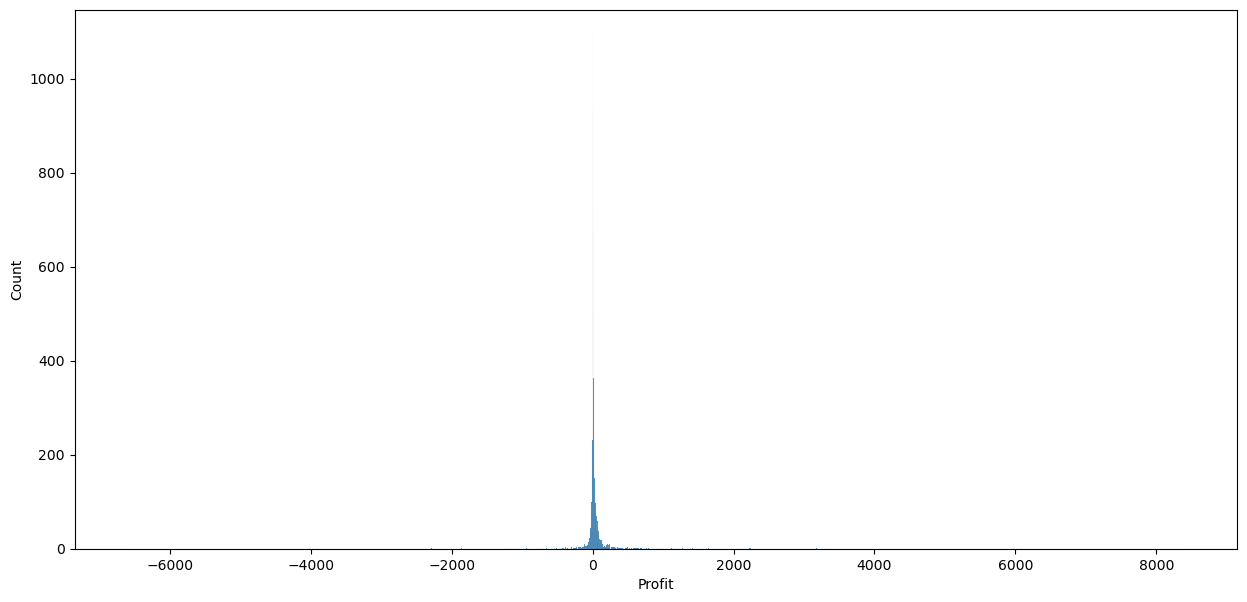

In [10]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='Profit')

In [11]:
df.columns=df.columns.str.lower()

In [12]:
df.columns

Index(['row id', 'order id', 'order date', 'ship mode', 'customer id',
       'customer name', 'segment', 'state', 'postal code', 'region',
       'product id', 'category', 'sub-category', 'product name', 'sales',
       'quantity', 'discount', 'profit', 'country', 'state'],
      dtype='object')

In [13]:
transaction=df.groupby('order id')['sub-category'].apply(list).tolist()

In [14]:
te=TransactionEncoder()
te_arry=te.fit(transaction).transform(transaction)
basket=pd.DataFrame(te_arry,columns=te.columns_)
basket

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5005,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5006,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5007,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [15]:
frequent_itemsets =apriori(basket,min_support=0.02,use_colnames=True)
frequent_itemsets=frequent_itemsets.sort_values(by="support", ascending=False)

In [17]:
rules=association_rules(frequent_itemsets,metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)

In [18]:
print(" Frequent Itemsets:")
print(frequent_itemsets.head(10))

print("\n Association Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))

 Frequent Itemsets:
     support       itemsets
3   0.262727      (Binders)
11  0.237772        (Paper)
8   0.175085  (Furnishings)
12  0.162507       (Phones)
13  0.155121      (Storage)
2   0.145937          (Art)
0   0.143342  (Accessories)
5   0.114993       (Chairs)
1   0.090038   (Appliances)
9   0.069076       (Labels)

 Association Rules:
     antecedents    consequents   support  confidence      lift
4      (Binders)   (Appliances)  0.025953    0.098784  1.097140
5   (Appliances)      (Binders)  0.025953    0.288248  1.097140
7       (Phones)          (Art)  0.024755    0.152334  1.043833
6          (Art)       (Phones)  0.024755    0.169631  1.043833
0  (Furnishings)       (Phones)  0.029547    0.168757  1.038458
1       (Phones)  (Furnishings)  0.029547    0.181818  1.038458
8        (Paper)   (Appliances)  0.021761    0.091520  1.016458
9   (Appliances)        (Paper)  0.021761    0.241685  1.016458
2  (Furnishings)      (Storage)  0.027550    0.157355  1.014401
3      (Sto

In [19]:
transactions = df.groupby('order id')['sub-category'].apply(list).tolist()

# ----------------------
# One-Hot Encoding
# ----------------------
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# ----------------------
# FP-Growth
# ----------------------
frequent_itemsets = fpgrowth(basket, min_support=0.02, use_colnames=True)  # 2% support
frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)

# ----------------------
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)

# ----------------------
print(" Frequent Itemsets:")
print(frequent_itemsets.head(10))

print("\n Association Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))

 Frequent Itemsets:
     support       itemsets
1   0.262727      (Binders)
3   0.237772        (Paper)
9   0.175085  (Furnishings)
0   0.162507       (Phones)
11  0.155121      (Storage)
5   0.145937          (Art)
6   0.143342  (Accessories)
7   0.114993       (Chairs)
12  0.090038   (Appliances)
10  0.069076       (Labels)

 Association Rules:
     antecedents    consequents   support  confidence      lift
4      (Binders)   (Appliances)  0.025953    0.098784  1.097140
5   (Appliances)      (Binders)  0.025953    0.288248  1.097140
7       (Phones)          (Art)  0.024755    0.152334  1.043833
6          (Art)       (Phones)  0.024755    0.169631  1.043833
0  (Furnishings)       (Phones)  0.029547    0.168757  1.038458
1       (Phones)  (Furnishings)  0.029547    0.181818  1.038458
8        (Paper)   (Appliances)  0.021761    0.091520  1.016458
9   (Appliances)        (Paper)  0.021761    0.241685  1.016458
2  (Furnishings)      (Storage)  0.027550    0.157355  1.014401
3      (Sto